In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_color_image(file_path, threshold):
    """
    Creates a color image from a multi-channel image stored in a file.
    Each pixel in the color image has the color of the channel with the highest value if this value is above a threshold, and the color red otherwise.

    Parameters:
    file_path (str): The path to the file containing the multi-channel image.
    threshold (int): The threshold above which a channel's value must be for the pixel to take its color.

    Returns:
    color_image (numpy.ndarray): The created color image.
    """
    
    # Validate parameters
    if not isinstance(file_path, str):
        raise ValueError("file_path must be a string")
    if not isinstance(threshold, int) or threshold < 0:
        raise ValueError("threshold must be a positive integer")

    # Open the file
    try:
        f = h5py.File(file_path, 'r')
    except IOError:
        raise ValueError(f"Could not open file at {file_path}")

    # Ensure the file contains 'exported_data'
    if 'exported_data' not in f:
        raise ValueError(f"File at {file_path} does not contain 'exported_data'")

    data = f['exported_data']

    # Find the index of the channel with the highest value for each pixel
    indices = np.argmax(data, axis=-1)

    # Find the maximum value for each pixel
    max_values = np.max(data, axis=-1)

    # Create a color map
    colors = np.array([[255, 0, 0],   # Red for values below the threshold
                       [63, 63, 63],   # Dark gray for channel 1
                       [127, 127, 127],   # Medium gray for channel 2
                       [191, 191, 191],   # Light gray for channel 3
                       [255, 255, 255]])  # White for channel 4

    # Map the indices to the corresponding colors, but only for pixels where the maximum value is above the threshold
    color_image = np.where(max_values[..., np.newaxis] > threshold, colors[indices + 1], colors[0])

    return color_image

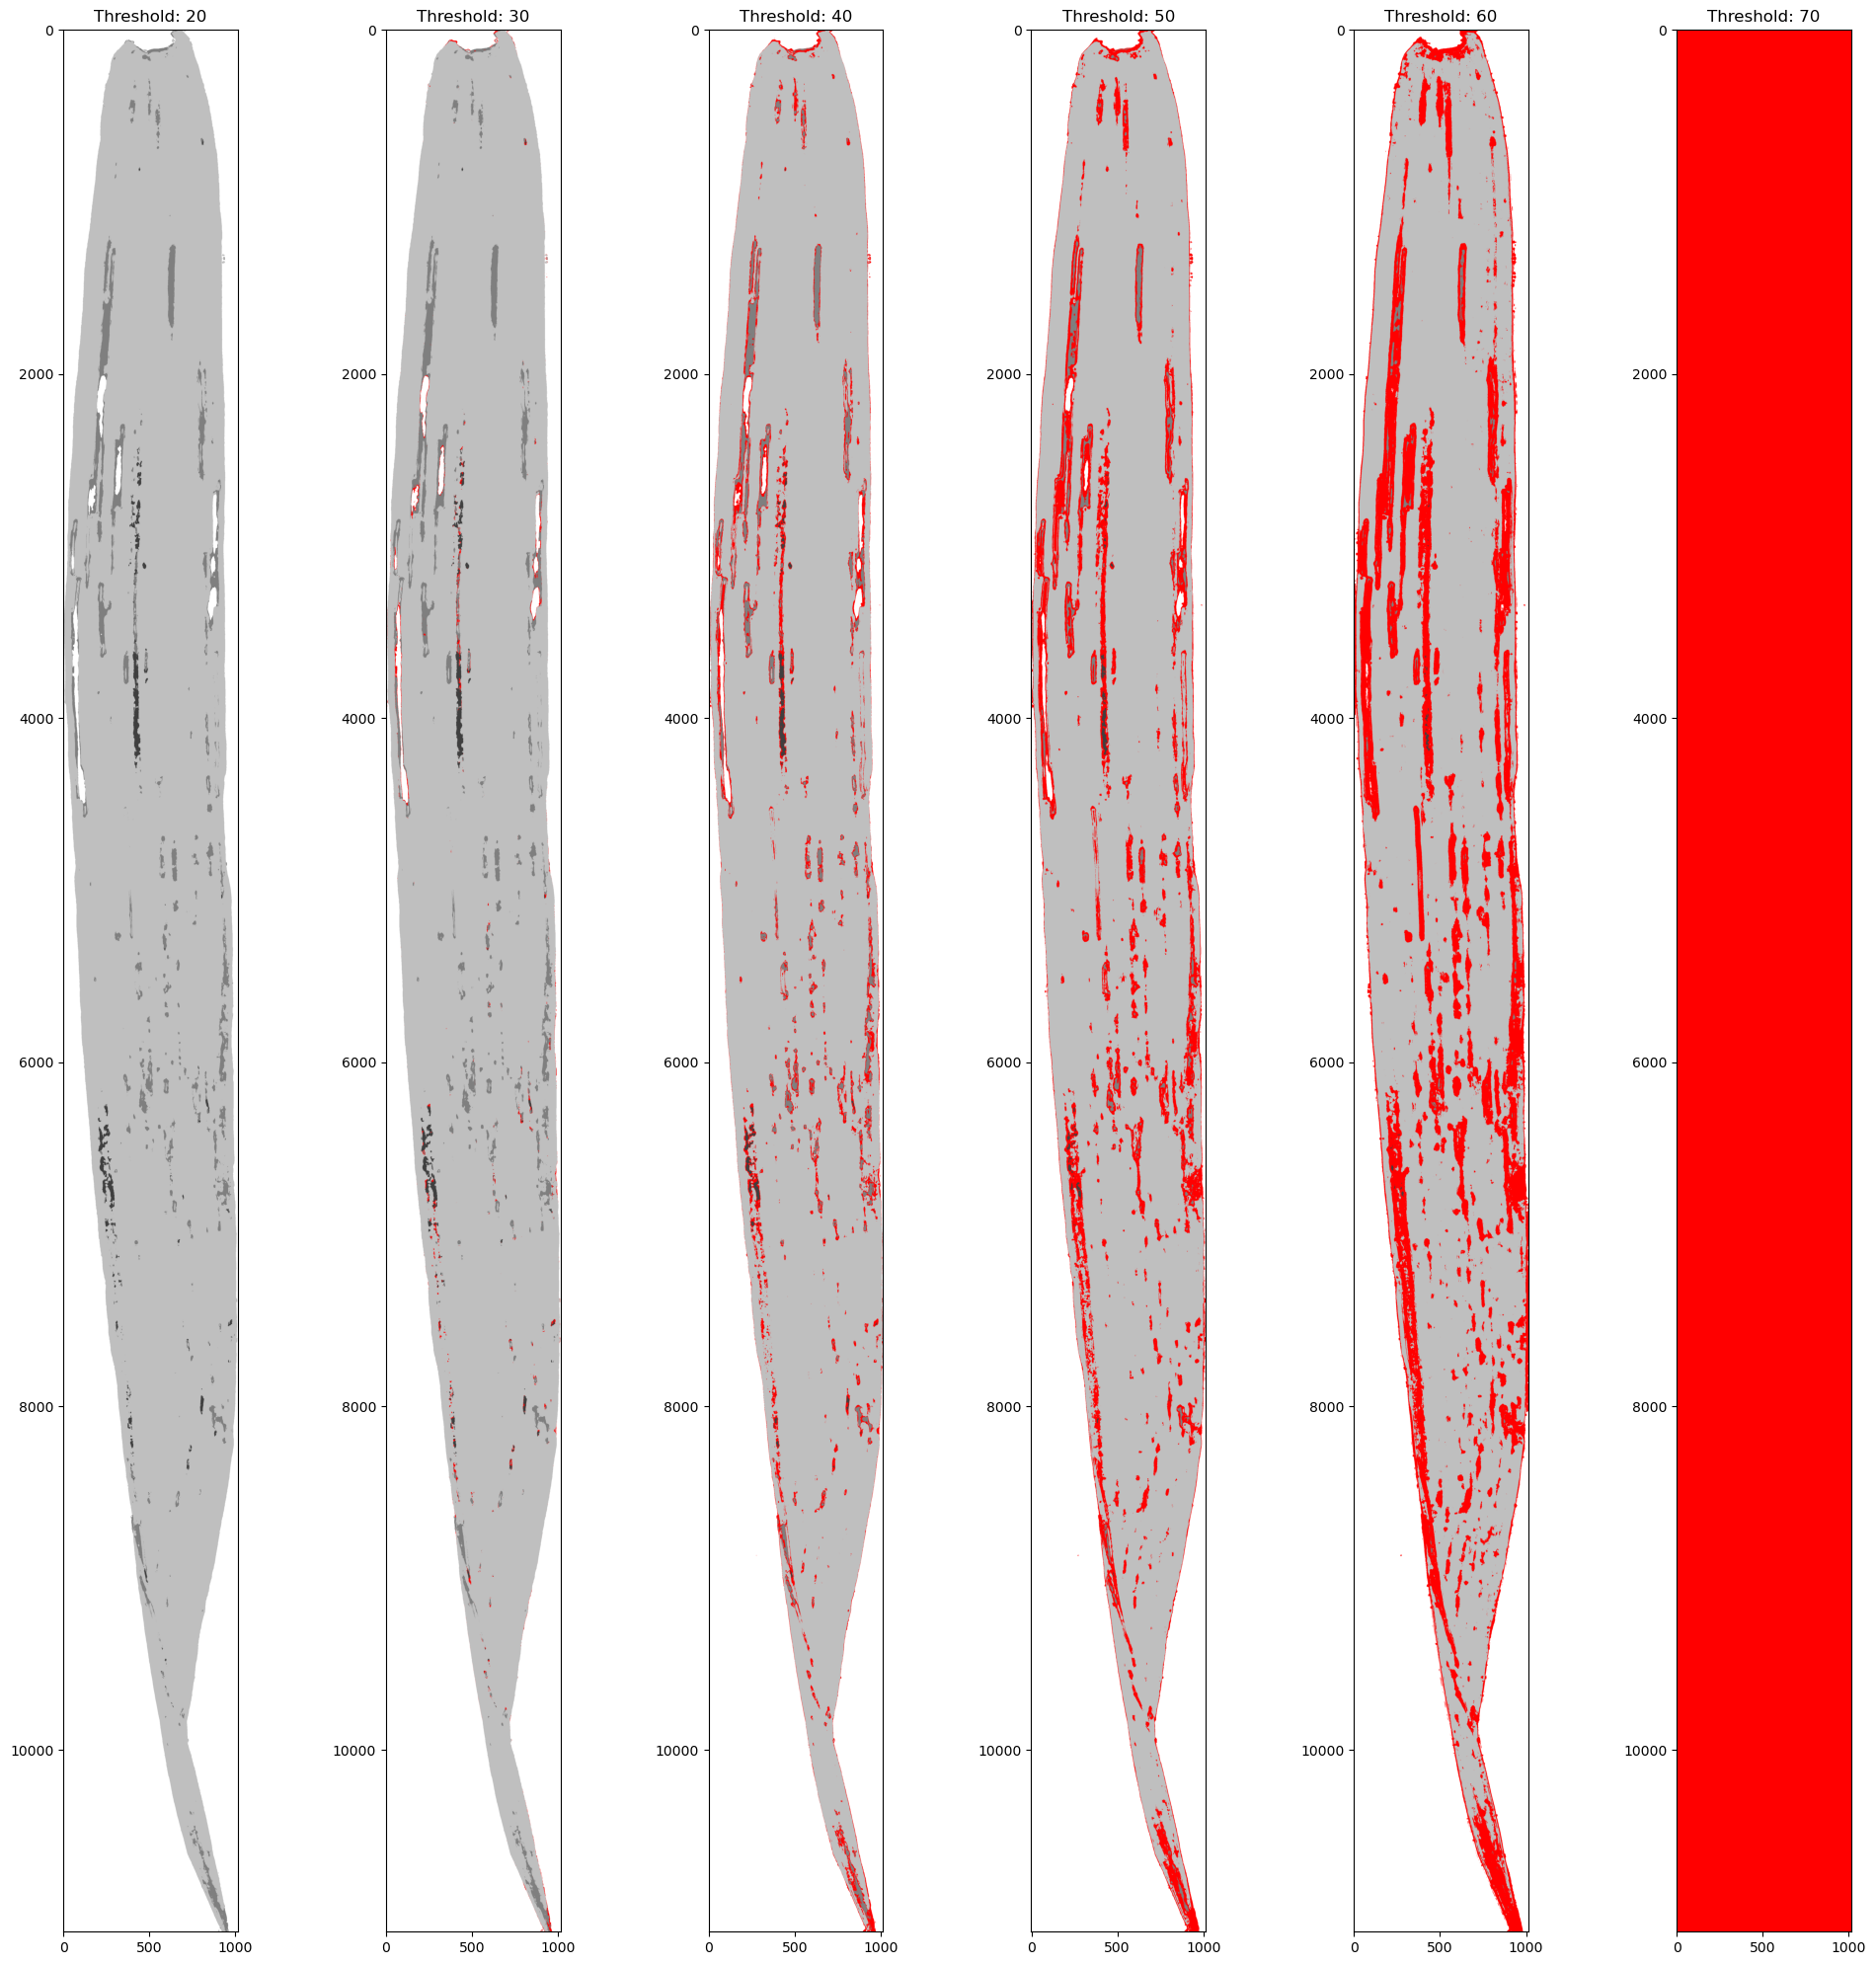

In [3]:
# List of threshold values
thresholds = [20, 30, 40, 50, 60, 70]

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

# For each threshold, create a color image and add it to the subplot
for i, threshold in enumerate(thresholds):
    color_image = create_color_image("111_leaf2_Probabilities.h5", threshold)
    axes[i].imshow(color_image)
    axes[i].set_title(f'Threshold: {threshold}')

# Display the figure
plt.tight_layout()
plt.show()